### 决策树回归

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

disbetes = datasets.load_diabetes()
x = disbetes.data
y = disbetes.target
x_train,x_test,y_train,y_test = train_test_split(x,x,random_state=86)

In [9]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [11]:
reg.score(x_test,y_test)

0.4865220850762805

In [13]:
reg.score(x_train,y_train)

1.0

### 绘制学习曲线

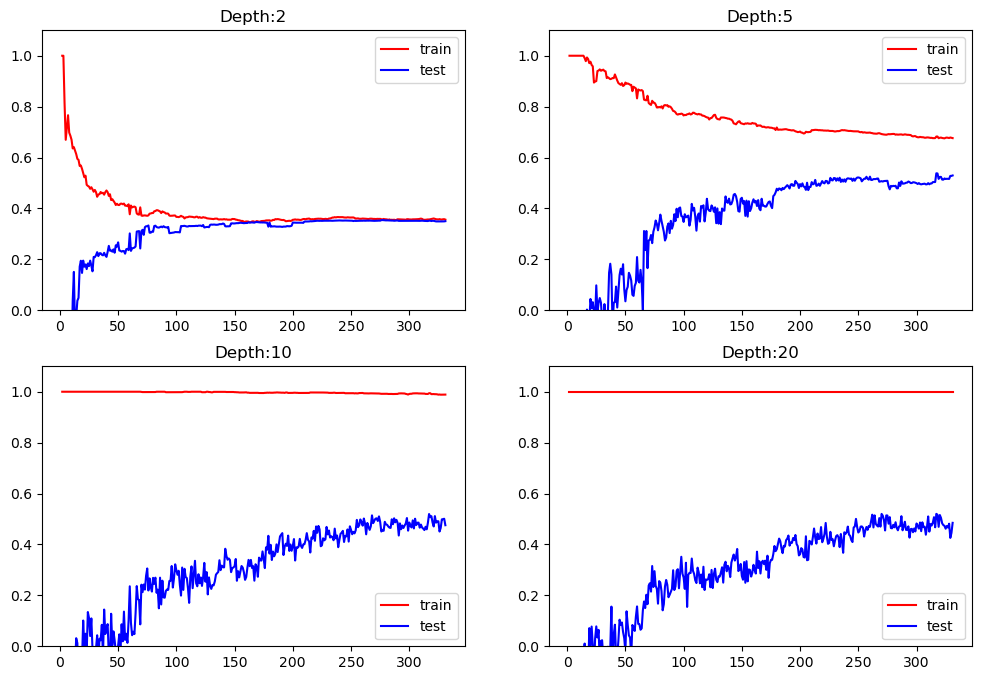

In [30]:
from sklearn.metrics import r2_score
# 导入决定系数r2_score,用于评估回归模型的拟合优度

plt.rcParams["figure.figsize"] = (12,8)
# 设置matplotlib绘图的默认尺寸为宽12、高8
max_depth = [2,5,10,20]

for i,depth in enumerate(max_depth):
# enumerate:用于将一个可迭代对象（如列表）转换成枚举对象，每个元素会被包装成（索引，值）的形式
# i用于接受元素的索引（从0开始）
# depth用于接收元素的值（即max_depth中的具体深度数值）
    reg = DecisionTreeRegressor(max_depth=depth)
    train_error,test_error = [],[]
    # 初始化两个空列表分别存储训练集和测试集的R2分数
    for k in range(len(x_train)):
        reg.fit(x_train[:k+1],y_train[:k+1])

        y_train_pred = reg.predict(x_train[:k+1])
        train_error.append(r2_score(y_train[:k+1],y_train_pred))
        
        y_test_pred = reg.predict(x_test)
        test_error.append(r2_score(y_test,y_test_pred))

    plt.subplot(2,2,i+1)
    # 2（第一个参数）：将画布划分为2行
    # 2（第二个参数）：将画布划分为2列
    # i+1（第三个参数）：指定当前子图的编号，编号从1开始
    plt.ylim(0,1.1)
    plt.title("Depth:{0}".format(depth))
    plt.plot([k+1 for k in range(len(x_train))],train_error,color = "red",label = "train")
    plt.plot([k+1 for k in range(len(x_train))],test_error,color = "blue",label = "test")
    plt.legend()
    
plt.show()

### 网格搜索

In [43]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[n for n in range(2,15)],
    'min_samples_leaf':[sn for sn in range(3,20)],
}

grid = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid = params,
    n_jobs = -1
)

In [45]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                              13, 14, 15, 16, 17, 18, 19]})

In [47]:
grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 4}

In [49]:
grid.best_score_

0.5261407264016642

In [51]:
reg = grid.best_estimator_

In [53]:
reg.score(x_test,y_test)

0.5595876325452946